Decision Tree

Assignment


About the data:
Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or

The company dataset looks like this:

Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [3]:
cdata=pd.read_csv("Company_Data.csv")
cdata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [6]:
cdata['ShelveLoc'] = label_encoder.fit_transform(cdata['ShelveLoc'])
cdata['Urban'] = label_encoder.fit_transform(cdata['Urban'])
cdata['US'] = label_encoder.fit_transform(cdata['US'])
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [7]:
cdata['Sales_Efficiency'] = cdata.Sales.map(lambda x: 'High' if x>8 else 'Low')
cdata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Efficiency
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [8]:
data1= pd.get_dummies(cdata,columns=['ShelveLoc','Urban','US'])
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Efficiency,ShelveLoc_0,ShelveLoc_1,ShelveLoc_2,Urban_0,Urban_1,US_0,US_1
0,9.50,138,73,11,276,120,42,17,High,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,High,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,High,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Low,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,Low,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,High,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,Low,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,Low,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,Low,1,0,0,0,1,0,1


In [11]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','Education','ShelveLoc_0','ShelveLoc_1','ShelveLoc_2','Urban_0','Urban_1','US_0','US_1']

In [12]:
X = data1[feature_cols]
Y = data1['Sales_Efficiency']

In [13]:
Y.value_counts()

Low     236
High    164
Name: Sales_Efficiency, dtype: int64

In [14]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=0)

Building Decision Tree Classifier using Entropy Criteria

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [16]:
model.get_n_leaves()

21

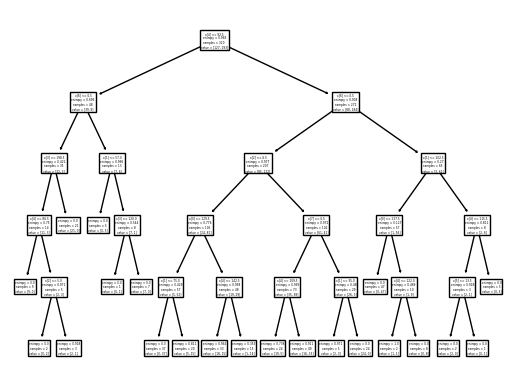

In [17]:
#PLot the decision tree
tree.plot_tree(model);

In [18]:
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

Low     44
High    36
dtype: int64

In [19]:
preds

array(['High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'High', 'High', 'High', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'High', 'High',
       'High'], dtype=object)

In [20]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,High,Low
Sales_Efficiency,,
High,26,11
Low,10,33


In [21]:
Y_test.value_counts()

Low     43
High    37
Name: Sales_Efficiency, dtype: int64

In [22]:
# Accuracy
np.mean(preds==Y_test)

0.7375

In [23]:
model.score(X_train,Y_train)

0.85625

In [24]:
from sklearn.metrics import accuracy_score #importing metrics for accuracy calculation (confusion matrix)
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 73.75


In [25]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        High       0.70      0.72      0.71        36
         Low       0.77      0.75      0.76        44

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [27]:
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6)

In [28]:
#prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.7375

In [29]:
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 73.75
